In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1d29140f19874df9b10e2235ce6338d1 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_1d29140f19874df9b10e2235ce6338d1 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_1d29140f19874df9b10e2235ce6338d1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-t2jrbFDjrIZxYCRVRDPuJbNLGxueFPWVOrR6UJMVOrt',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_1d29140f19874df9b10e2235ce6338d1)

body = client_1d29140f19874df9b10e2235ce6338d1.get_object(Bucket='pjdsc-donotdelete-pr-sesqya1vjps57t',Key='country_vaccinations.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [2]:
df['date'] = pd.to_datetime(df['date'])

In [3]:
# Cleaning data
df.drop('source_website',axis=1,inplace=True)

In [4]:
columns = df.columns.values.tolist()
for column in columns:
    print(df[column].isnull().value_counts())

False    8451
Name: country, dtype: int64
False    8451
Name: iso_code, dtype: int64
False    8451
Name: date, dtype: int64
False    5231
True     3220
Name: total_vaccinations, dtype: int64
False    4688
True     3763
Name: people_vaccinated, dtype: int64
True     5265
False    3186
Name: people_fully_vaccinated, dtype: int64
False    4415
True     4036
Name: daily_vaccinations_raw, dtype: int64
False    8260
True      191
Name: daily_vaccinations, dtype: int64
False    5231
True     3220
Name: total_vaccinations_per_hundred, dtype: int64
False    4688
True     3763
Name: people_vaccinated_per_hundred, dtype: int64
True     5265
False    3186
Name: people_fully_vaccinated_per_hundred, dtype: int64
False    8260
True      191
Name: daily_vaccinations_per_million, dtype: int64
False    8451
Name: vaccines, dtype: int64
False    8451
Name: source_name, dtype: int64


In [5]:
import numpy as np
df.dropna(subset=['total_vaccinations'],inplace=True)
df['people_fully_vaccinated'].fillna(value=0,inplace=True)
df['people_vaccinated'] = df['total_vaccinations'] - df['people_fully_vaccinated']
for ind,row in df.iterrows():
    if row['daily_vaccinations_raw'] != np.nan:
        row['daily_vaccinations'] = row['daily_vaccinations_raw']
df.dropna(subset=['total_vaccinations_per_hundred'],inplace=True)
df['people_fully_vaccinated_per_hundred'].fillna(value=0,inplace=True)
df['people_vaccinated_per_hundred'] = df['total_vaccinations_per_hundred'] - df['people_fully_vaccinated_per_hundred']

In [6]:
df.drop('daily_vaccinations_raw',axis=1,inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [7]:
df.fillna(value=0,inplace=True)

In [8]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan
1,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,1367.0,0.02,0.02,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan
2,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,2862.0,0.14,0.14,0.0,74.0,Oxford/AstraZeneca,Government of Afghanistan
3,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Pfizer/BioNTech,Ministry of Health
4,Albania,ALB,2021-01-12,128.0,128.0,0.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health


In [9]:
url = 'https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv'
continents = pd.read_csv(url)

In [10]:
continents.drop('Continent_Code',axis=1,inplace=True)
continents.drop('Country_Name',axis=1,inplace=True)
continents.drop('Country_Number',axis=1,inplace=True)

In [11]:
continents.rename(columns={'Three_Letter_Country_Code': 'iso_code'},inplace=True)

In [12]:
df = pd.merge(df,continents,on='iso_code')

In [13]:
df.rename(columns={'Continent_Name': 'continent'},inplace=True)

In [14]:
df.drop('source_name',axis=1,inplace=True)

In [15]:
df['continent'].value_counts()

Europe           2649
Asia             1061
North America     537
South America     439
Africa            301
Oceania            50
Name: continent, dtype: int64

In [16]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,continent,Two_Letter_Country_Code
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Oxford/AstraZeneca,Asia,AF
1,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,1367.0,0.02,0.02,0.0,35.0,Oxford/AstraZeneca,Asia,AF
2,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,2862.0,0.14,0.14,0.0,74.0,Oxford/AstraZeneca,Asia,AF
3,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Pfizer/BioNTech,Europe,AL
4,Albania,ALB,2021-01-12,128.0,128.0,0.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Europe,AL


In [17]:
df['month'] = df['date'].apply(lambda x: x.month)
december_df = df[df['month'] == 12]
january_df = df[df['month'] == 1]
february_df = df[df['month'] == 2]
march_df = df[df['month'] == 3]
df['month'].value_counts()

3     2142
2     1592
1     1140
12     163
Name: month, dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

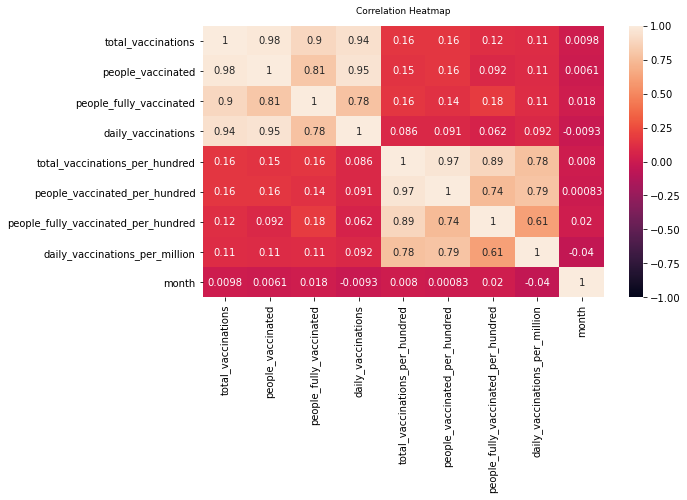

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,5))
heatmap = sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize': 9},pad=12)

Text(0.5, 1.0, 'Correlation Heatmap')

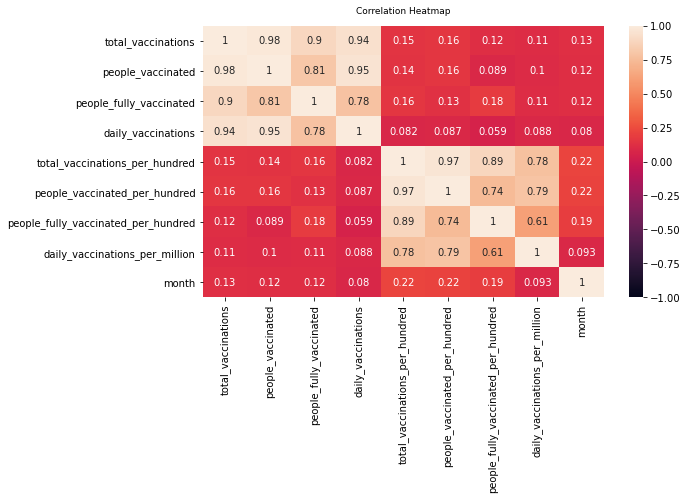

In [19]:
sample_df = df[df['month'] != 12]
plt.figure(figsize=(9,5))
heatmap = sns.heatmap(sample_df.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize': 9},pad=12)

In [20]:
sample_df.shape

(4874, 15)

In [21]:
# Getting top rates for december

countries = list(december_df['country'].unique())
full_vacc_rate = []
avg_daily_vacc = []
full_vacc_per_hundred = []
avg_daily_vacc_per_million = []
continent = []
iso_a3 = []
for country in countries:
    country_df = december_df[december_df['country'] == country]
    full_vacc_rate.append(country_df['people_fully_vaccinated'].max()/country_df['total_vaccinations'].max())
    avg_daily_vacc.append(country_df['daily_vaccinations'].mean())
    full_vacc_per_hundred.append(country_df['people_fully_vaccinated_per_hundred'].max())
    avg_daily_vacc_per_million.append(country_df['daily_vaccinations_per_million'].mean())
    continent.append(country_df['continent'].unique()[0])
    iso_a3.append(country_df['iso_code'].unique()[0])
december = pd.DataFrame(columns=['country', 'iso_a3','full_vacc_rate', 'avg_daily_vacc','full_vacc_per_hundred','avg_daily_vacc_per_million','continent'])
december['country'] = countries
december['iso_a3'] = iso_a3
december['full_vacc_rate'] = full_vacc_rate
december['avg_daily_vacc'] = avg_daily_vacc
december['full_vacc_per_hundred'] = full_vacc_per_hundred
december['avg_daily_vacc_per_million'] = avg_daily_vacc_per_million
december['continent'] = continent

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars


In [22]:
# Getting top rates for January
countries = list(january_df['country'].unique())
full_vacc_rate = []
avg_daily_vacc = []
full_vacc_per_hundred = []
avg_daily_vacc_per_million = []
continent = []
iso_a3 = []
for country in countries:
    country_df = df[df['country'] == country]
    full_vacc_rate.append(country_df['people_fully_vaccinated'].max()/country_df['total_vaccinations'].max())
    avg_daily_vacc.append(country_df['daily_vaccinations'].mean())
    full_vacc_per_hundred.append(country_df['people_fully_vaccinated_per_hundred'].max())
    avg_daily_vacc_per_million.append(country_df['daily_vaccinations_per_million'].mean())
    continent.append(country_df['continent'].unique()[0])
    iso_a3.append(country_df['iso_code'].unique()[0])
january = pd.DataFrame(columns=['country', 'iso_a3','full_vacc_rate', 'avg_daily_vacc','full_vacc_per_hundred','avg_daily_vacc_per_million','continent'])
january['country'] = countries
january['iso_a3'] = iso_a3
january['full_vacc_rate'] = full_vacc_rate
january['avg_daily_vacc'] = avg_daily_vacc
january['full_vacc_per_hundred'] = full_vacc_per_hundred
january['avg_daily_vacc_per_million'] = avg_daily_vacc_per_million
january['continent'] = continent

In [23]:
countries = list(february_df['country'].unique())
full_vacc_rate = []
avg_daily_vacc = []
full_vacc_per_hundred = []
avg_daily_vacc_per_million = []
continent = []
iso_a3 = []
for country in countries:
    country_df = february_df[february_df['country'] == country]
    full_vacc_rate.append(country_df['people_fully_vaccinated'].max()/country_df['total_vaccinations'].max())
    avg_daily_vacc.append(country_df['daily_vaccinations'].mean())
    full_vacc_per_hundred.append(country_df['people_fully_vaccinated_per_hundred'].max())
    avg_daily_vacc_per_million.append(country_df['daily_vaccinations_per_million'].mean())
    continent.append(country_df['continent'].unique()[0])
    iso_a3.append(country_df['iso_code'].unique()[0])
february = pd.DataFrame(columns=['country','iso_a3', 'full_vacc_rate', 'avg_daily_vacc','full_vacc_per_hundred','avg_daily_vacc_per_million','continent'])
february['country'] = countries
february['iso_a3'] = iso_a3
february['full_vacc_rate'] = full_vacc_rate
february['avg_daily_vacc'] = avg_daily_vacc
february['full_vacc_per_hundred'] = full_vacc_per_hundred
february['avg_daily_vacc_per_million'] = avg_daily_vacc_per_million
february['continent'] = continent

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars


In [24]:
countries = list(march_df['country'].unique())
full_vacc_rate = []
avg_daily_vacc = []
full_vacc_per_hundred = []
avg_daily_vacc_per_million = []
continent = []
iso_a3 = []
for country in countries:
    country_df = march_df[march_df['country'] == country]
    full_vacc_rate.append(country_df['people_fully_vaccinated'].max()/country_df['total_vaccinations'].max())
    avg_daily_vacc.append(country_df['daily_vaccinations'].mean())
    full_vacc_per_hundred.append(country_df['people_fully_vaccinated_per_hundred'].max())
    avg_daily_vacc_per_million.append(country_df['daily_vaccinations_per_million'].mean())
    continent.append(country_df['continent'].unique()[0])
    iso_a3.append(country_df['iso_code'].unique()[0])
march = pd.DataFrame(columns=['country','iso_a3', 'full_vacc_rate', 'avg_daily_vacc','full_vacc_per_hundred','avg_daily_vacc_per_million','continent'])
march['country'] = countries
march['iso_a3'] = iso_a3
march['full_vacc_rate'] = full_vacc_rate
march['avg_daily_vacc'] = avg_daily_vacc
march['full_vacc_per_hundred'] = full_vacc_per_hundred
march['avg_daily_vacc_per_million'] = avg_daily_vacc_per_million
march['continent'] = continent

[Text(0, 0.5, 'Average Daily Vaccinations'), Text(0.5, 0, 'Continent')]

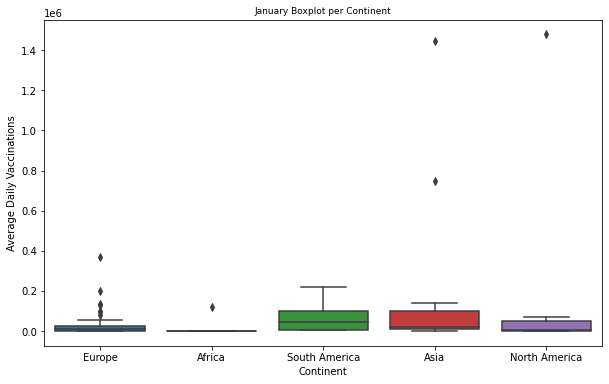

In [25]:
plt.figure(figsize=(10,6))
box1 = sns.boxplot(x='continent',y='avg_daily_vacc',data=january)
box1.set_title('January Boxplot per Continent',fontdict={'fontsize': 9})
box1.set(xlabel='Continent',ylabel='Average Daily Vaccinations')

[Text(0, 0.5, 'Average Daily Vaccinations'), Text(0.5, 0, 'Continent')]

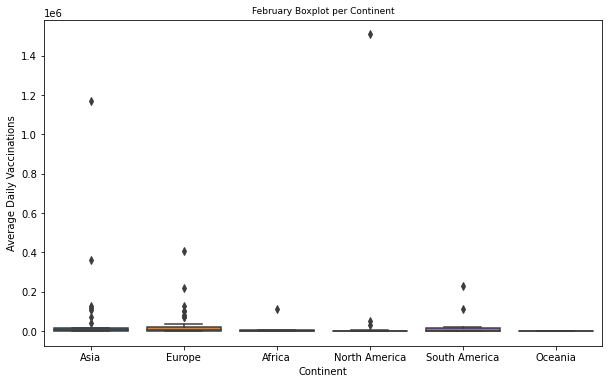

In [26]:
plt.figure(figsize=(10,6))
box2 = sns.boxplot(x='continent',y='avg_daily_vacc',data=february)
box2.set_title('February Boxplot per Continent',fontdict={'fontsize': 9})
box2.set(xlabel='Continent',ylabel='Average Daily Vaccinations')

[Text(0, 0.5, 'Average Daily Vaccinations'), Text(0.5, 0, 'Continent')]

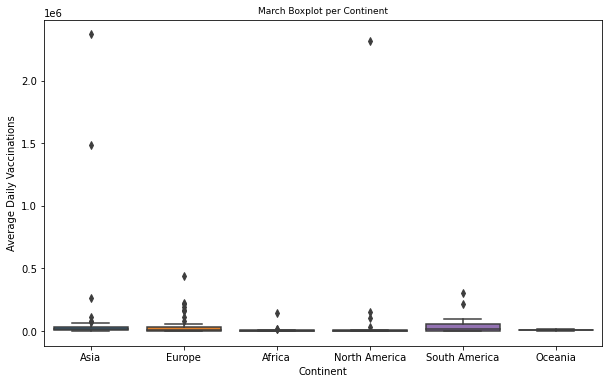

In [27]:
plt.figure(figsize=(10,6))
box3 = sns.boxplot(x='continent',y='avg_daily_vacc',data=march)
box3.set_title('March Boxplot per Continent',fontdict={'fontsize': 9})
box3.set(xlabel='Continent',ylabel='Average Daily Vaccinations')

[Text(0, 0.5, 'Average Daily Vaccinations Per Million'),
 Text(0.5, 0, 'Continent')]

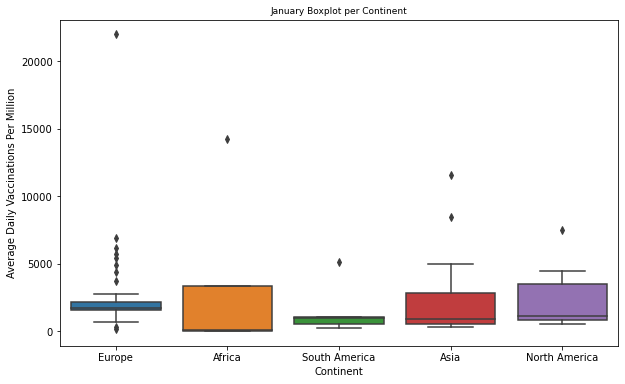

In [28]:
plt.figure(figsize=(10,6))
box1 = sns.boxplot(x='continent',y='avg_daily_vacc_per_million',data=january)
box1.set_title('January Boxplot per Continent',fontdict={'fontsize': 9})
box1.set(xlabel='Continent',ylabel='Average Daily Vaccinations Per Million')

[Text(0, 0.5, 'Average Daily Vaccinations Per Million'),
 Text(0.5, 0, 'Continent')]

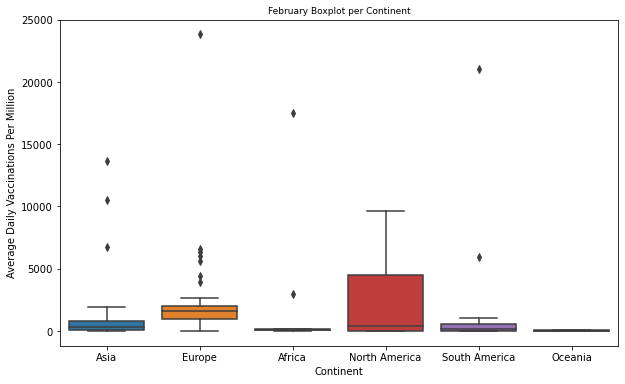

In [29]:
plt.figure(figsize=(10,6))
box2 = sns.boxplot(x='continent',y='avg_daily_vacc_per_million',data=february)
box2.set_title('February Boxplot per Continent',fontdict={'fontsize': 9})
box2.set(xlabel='Continent',ylabel='Average Daily Vaccinations Per Million')

[Text(0, 0.5, 'Average Daily Vaccinations Per Million'),
 Text(0.5, 0, 'Continent')]

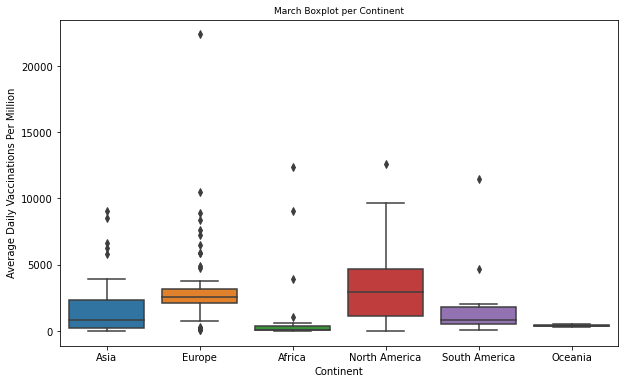

In [30]:
plt.figure(figsize=(10,6))
box3 = sns.boxplot(x='continent',y='avg_daily_vacc_per_million',data=march)
box3.set_title('March Boxplot per Continent',fontdict={'fontsize': 9})
box3.set(xlabel='Continent',ylabel='Average Daily Vaccinations Per Million')

In [31]:
january['avg_daily_vacc_per_million'].replace(0,np.nan,inplace=True)
january.head()

,country,iso_a3,full_vacc_rate,avg_daily_vacc,full_vacc_per_hundred,avg_daily_vacc_per_million,continent
0,Albania,ALB,0.010222,923.206897,0.02,320.827586,Europe
1,Algeria,DZA,0.000000,1259.333333,0.00,28.666667,Africa
2,Andorra,AND,0.136197,166.090909,1.64,2149.636364,Europe
3,Argentina,ARG,0.185278,44469.840580,1.46,983.942029,South America
4,Austria,AUT,0.264433,15350.588889,4.37,1704.411111,Europe


In [32]:
!pip install geopandas
!pip install mapclassify

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


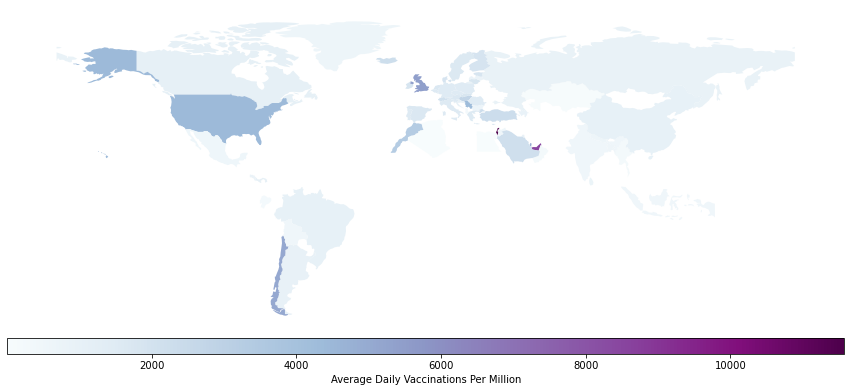

In [34]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
jan = world.merge(january,on='iso_a3')
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig,ax=plt.subplots(1,figsize=(15,9))
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("bottom", size="5%", pad=0.1)
jan.plot(column='avg_daily_vacc_per_million',cmap='BuPu',legend=True,ax=ax,cax=cax
        ,legend_kwds={'label': 'Average Daily Vaccinations Per Million','orientation':'horizontal'},
         missing_kwds={'label': 'Zero','color': 'lightgrey','edgecolor': 'white','hatch': '///'})

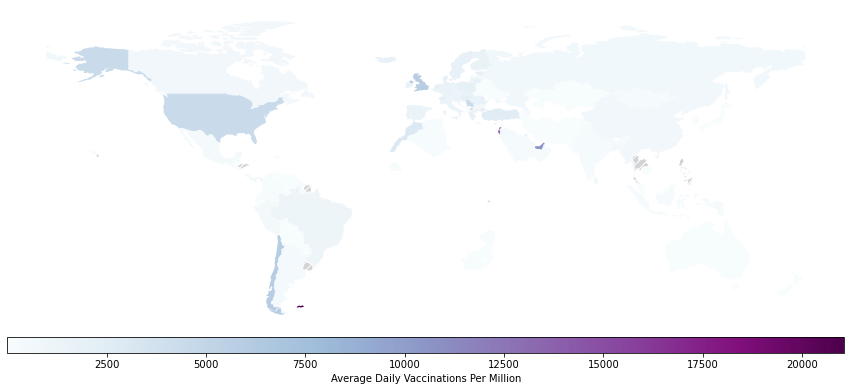

In [35]:
february['avg_daily_vacc_per_million'].replace(0,np.nan,inplace=True)
feb = world.merge(february,on='iso_a3')
fig,ax=plt.subplots(1,figsize=(15,9))
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("bottom", size="5%", pad=0.1)
feb.plot(column='avg_daily_vacc_per_million',cmap='BuPu',legend=True,ax=ax,cax=cax
        ,legend_kwds={'label': 'Average Daily Vaccinations Per Million','orientation':'horizontal'},
         missing_kwds={'label': 'Zero','color': 'lightgrey','edgecolor': 'white','hatch': '///'})

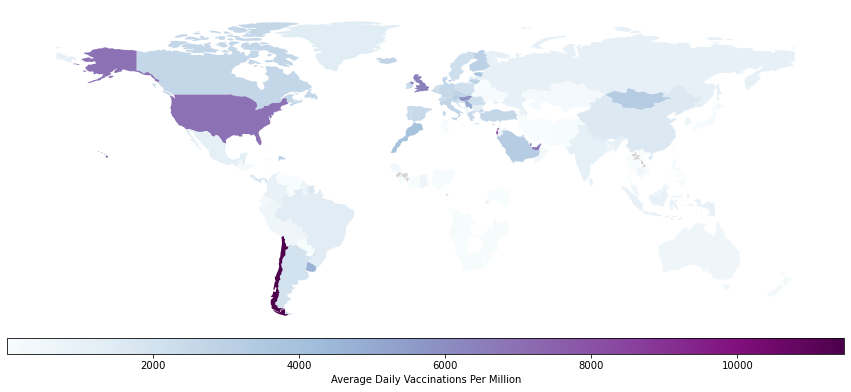

In [36]:
march['avg_daily_vacc_per_million'].replace(0,np.nan,inplace=True)
mar = world.merge(march,on='iso_a3')
vmin = mar['avg_daily_vacc_per_million'].min()
vmax = mar['avg_daily_vacc_per_million'].max()
fig,ax=plt.subplots(1,figsize=(15,9))
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("bottom", size="5%", pad=0.1)
mar.plot(column='avg_daily_vacc_per_million',cmap='BuPu',legend=True,ax=ax,cax=cax
        ,legend_kwds={'label': 'Average Daily Vaccinations Per Million','orientation':'horizontal'},
         missing_kwds={'label': 'Zero','color': 'lightgrey','edgecolor': 'white','hatch': '///'})

In [37]:
for frame in [january,february,march]:
    frame.fillna(value=0,inplace=True)
january = january[january['avg_daily_vacc_per_million'] != 0]
february = february[february['avg_daily_vacc_per_million'] != 0]
march = march[march['avg_daily_vacc_per_million'] != 0]

In [38]:
for frame in [january,february,march]:
    frame['avg_daily_vacc'] = (frame['avg_daily_vacc'] - frame['avg_daily_vacc'].min())/(frame['avg_daily_vacc'].max() - frame['avg_daily_vacc'].min())
    frame['avg_daily_vacc_per_million'] = (frame['avg_daily_vacc_per_million'] - frame['avg_daily_vacc_per_million'].min())/(frame['avg_daily_vacc_per_million'].max() - frame['avg_daily_vacc_per_million'].min())

In [40]:
january.to_csv('january.csv')
february.to_csv('february.csv')
march.to_csv('march.csv')

In [39]:
for frame in [january,february,march]:
    frame.reset_index(inplace=True)
    frame.drop('index',axis=1,inplace=True)